In [50]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random
import operator
from termcolor import colored

In [51]:
# width = 400
# height = 400

# block_size = 80
# num_blocks_x = width // block_size
# num_blocks_y = height // block_size

# image = np.ones((height, width), dtype=np.uint8) * 255

# for i in range(num_blocks_y):
#     for j in range(num_blocks_x):
#         block_type = np.random.choice(['white', 'black', 'mixed'], p=[1/3, 1/3, 1/3])
#         if block_type == 'white':
#             image[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = 255
#         elif block_type == 'black':
#             image[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = 0
#         elif block_type == 'mixed':
#             image[i*block_size:(i+1)*block_size, j*block_size:(j+1)*block_size] = np.random.choice([0, 255])

# cv.imwrite("random_image3.png", image)

# plt.imshow(image, cmap='gray')
# plt.axis('off')
# plt.show()

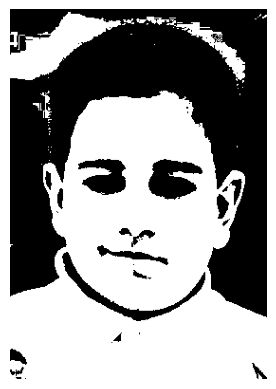

(390, 271)


In [52]:
im_gray = cv.imread('images/random_image.png', cv.IMREAD_GRAYSCALE)
im_gray = cv.imread('images/random_image2.png', cv.IMREAD_GRAYSCALE)
im_gray = cv.imread('images/random_image3.png', cv.IMREAD_GRAYSCALE)

im_gray = cv.imread('images/shehab.png', cv.IMREAD_GRAYSCALE)

# im_gray = cv.imread('images/longcat.jpg', cv.IMREAD_GRAYSCALE)


thresh =130
im_bw = cv.threshold(im_gray, thresh, 1, cv.THRESH_BINARY)[1]

plt.imshow(im_bw, cmap='gray')
plt.axis('off')
plt.show()
print(im_bw.shape)


In [53]:
def decimalToBinary(n):
    return bin(n).replace("0b", "")

def binaryTodecimal(n):
    decimal = 0
    power = 1
    while n>0:
        rem = n%10
        n = n//10
        decimal += rem*power
        power = power*2
        
    return decimal

def calc_factors(dimension):
    n_factors = []
    for i in range(1, dimension + 1):
        if dimension % i == 0:
            n_factors.append(i)

    if 0 in n_factors:
        n_factors.remove(0)
        
    n = random.choice(n_factors)
    
    return n

def check(dimension):
    n_factors = []
    for i in range(1, dimension + 1):
        if dimension % i == 0:
            n_factors.append(i)
    return n_factors

# print(decimalToBinary(8))
class Window:
    def __init__(self,p,q):
        self.p=p
        self.q=q
        self.fitness=0
        self.bits=[]
    def get_size(self):
        print(self.p,self.q)
        
class CAC:
    population=[]
    fittest=Window(0,0)

    def __init__(self,population_size,img):
        self.population_size=population_size
        self.img=img
        self.generate_population()
        
        self.select_parents()
        ctr=0
        while(ctr<10):

            parent_1=self.select_parents()
            parent_2=self.select_parents()

            child_1,child_2 = self.crossover(parent_1,parent_2) 

            self.population.append(child_1)
            self.population.append(child_2)

            
            self.population.sort(key=lambda x:x.fitness,reverse=True)
            
            if(self.population[0].fitness == self.fittest.fitness):
                ctr=ctr+1
            elif(self.population[0].fitness > self.fittest.fitness):
                self.fittest = self.population[0]
            else:
                ctr=0
        print(colored("Optimal window size PxQ:","red"),self.fittest.p,"X",self.fittest.q,sep=' ')
        print(colored("Compression ratio:","light_blue"),'%.2f'%self.fittest.fitness)
        print(colored("Relative data redundancy:","light_green"),'%.2f'%(1/self.fittest.fitness))
        print(colored("Compressed image:","cyan"),self.test(self.fittest))
        # print(self.fittest.bits)


    def test(self,window):
        p=window.p
        q=window.q
        blocks = {'B':0,'W':0,'M':0}
        for i in range(0, self.img.shape[1] - q + 1, q):
            for j in range(0, self.img.shape[0] - p + 1, p):
                window = im_bw[i:i+q, j:j+p]
                if(np.sum(window)==0):
                    blocks['B']=blocks['B']+1
                elif(np.sum(window)==(p*q)):
                    blocks['W']=blocks['W']+1
                else:
                    blocks['M']=blocks['M']+1        
        return blocks

    def generate_population(self):
        for _ in range(self.population_size):
            
            p=calc_factors(self.img.shape[0])
            q=calc_factors(self.img.shape[1])
            
            new_window=Window(p, q)
            blocks=self.assign_blocks(new_window)
            self.fitness(new_window,blocks)
            self.population.append(new_window)

    def assign_blocks(self,window_obj):
        p=window_obj.p
        q=window_obj.q
        blocks = {'B':0,'W':0,'M':0}
        for i in range(0, self.img.shape[1] - q + 1, q):
            for j in range(0, self.img.shape[0] - p + 1, p):
                # bits=[]
                window = im_bw[i:i+q, j:j+p]

                if(np.sum(window)==0):
                    blocks['B']=blocks['B']+1
                    # bits.append('B')
                elif(np.sum(window)==(p*q)):
                    blocks['W']=blocks['W']+1
                    # bits.append('W')
                else:
                    blocks['M']=blocks['M']+1
                    # bits.append("M" + np.array2string(window, prefix="[M", suffix="]").replace('\n', ''))
                # window_obj.bits.append(bits)
                        

        return blocks

    def fitness(self,window,blocks):
        highest_value_key=max(blocks.items(), key=operator.itemgetter(1))[0]
        arr=[]
        for obj in blocks:
            if(obj==highest_value_key and obj):
                arr.append(blocks[obj])
            else:               
                arr.append(blocks[obj]*2)

            if (obj=='M' and blocks.get('M') != 0):
                arr.append(window.p*window.q)


        n1=(self.img.shape[0])*(self.img.shape[1])
        n2=sum(arr)

        fitness_val = (n1) / (n2)

        window.fitness=fitness_val
        if(fitness_val>self.fittest.fitness):
            self.fittest=window

    

    def select_parents(self):
        tournament_size = 3
        tournament = random.sample(self.population, tournament_size)
        return max(tournament, key=lambda obj: obj.fitness)


    def crossover(self, parent1, parent2):
        parent_1_binary_p = decimalToBinary(parent1.p)
        parent_1_binary_q = decimalToBinary(parent1.q)
        parent_2_binary_p = decimalToBinary(parent2.p)
        parent_2_binary_q = decimalToBinary(parent2.q)

        parent1 = str(parent_1_binary_p) + str(parent_1_binary_q)
        parent2 = str(parent_2_binary_p) + str(parent_2_binary_q)

        split_point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:split_point] + parent2[split_point:]
        child2 = parent2[:split_point] + parent1[split_point:]

        child1 = self.mutation(child1)
        child2 = self.mutation(child2)

        child_1_obj = Window(0, 0)
        child_2_obj = Window(0, 0)

        child_1_obj.p = int(child1[:len(child1)], 2)
        child_1_obj.q = int(child1[len(child1)-1:], 2)
        child_2_obj.p = int(child2[:len(child2)], 2)
        child_2_obj.q = int(child2[len(child2)-1:], 2)

        if child_1_obj.p not in check(self.img.shape[0]):
            child_1_obj.p = calc_factors(self.img.shape[0])
        if child_1_obj.q not in check(self.img.shape[1]):
            child_1_obj.q = calc_factors(self.img.shape[1])

        if child_2_obj.p not in check(self.img.shape[0]):
            child_2_obj.p = calc_factors(self.img.shape[0])
        if child_2_obj.q not in check(self.img.shape[1]):
            child_2_obj.q = calc_factors(self.img.shape[1])

        b_1 = self.assign_blocks(child_1_obj)
        self.fitness(child_1_obj, b_1)

        b_2 = self.assign_blocks(child_2_obj)
        self.fitness(child_2_obj, b_2)

        return child_1_obj, child_2_obj

    

    def mutation(self,individual):
        chromosome = list(str(individual))
        if random.random() < 0.1:
            index = random.randint(0, len(chromosome) - 1)
            if (chromosome[index]):
                chromosome[index]='0'
            else:
                chromosome[index]='1'
        individual = str(''.join(chromosome))
        return individual   


In [54]:
myObj=CAC(100,im_bw)


Optimal window size PxQ: 390 X 1
Compression ratio: 158.22
Relative data redundancy: 0.01
Compressed image: {'B': 7, 'W': 0, 'M': 264}
